=== LAB 04: CLASSIFICATION AND kNN ANALYSIS ===

Dataset loaded: 469 samples, 96 features

A1: CLASSIFICATION PERFORMANCE ANALYSIS

=== Training Performance ===
Confusion Matrix:
[[311   0]
 [ 16   1]]
Accuracy: 0.9512
Precision: 0.9536
Recall: 0.9512
F1-Score: 0.9302

=== Testing Performance ===
Confusion Matrix:
[[133   0]
 [  8   0]]
Accuracy: 0.9433
Precision: 0.8897
Recall: 0.9433
F1-Score: 0.9157

=== Model Fit Assessment ===
Training Accuracy: 0.9512
Testing Accuracy: 0.9433
Accuracy Difference: 0.0080
Model Assessment: GOOD FIT (Similar train and test accuracies)

A2: REGRESSION METRICS ANALYSIS

=== Training Regression Metrics ===
MSE: 141.2001
RMSE: 11.8828
MAPE: 66.30%
R²: 0.0695

=== Testing Regression Metrics ===
MSE: 70.5259
RMSE: 8.3980
MAPE: 52.92%
R²: -0.0507

A3: SYNTHETIC DATA GENERATION
Generated 20 synthetic data points with 2 features
Class distribution: Class 0: 10, Class 1: 10


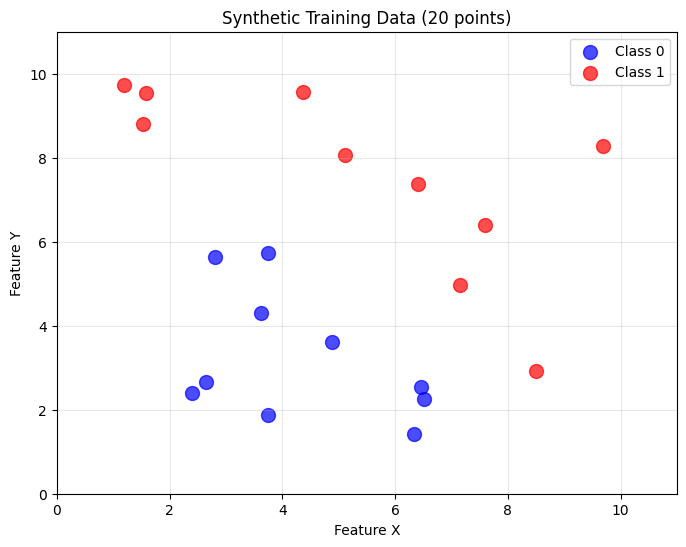


A4: TEST SET CLASSIFICATION (k=3)
Generated test set: 10201 points (101x101 grid)


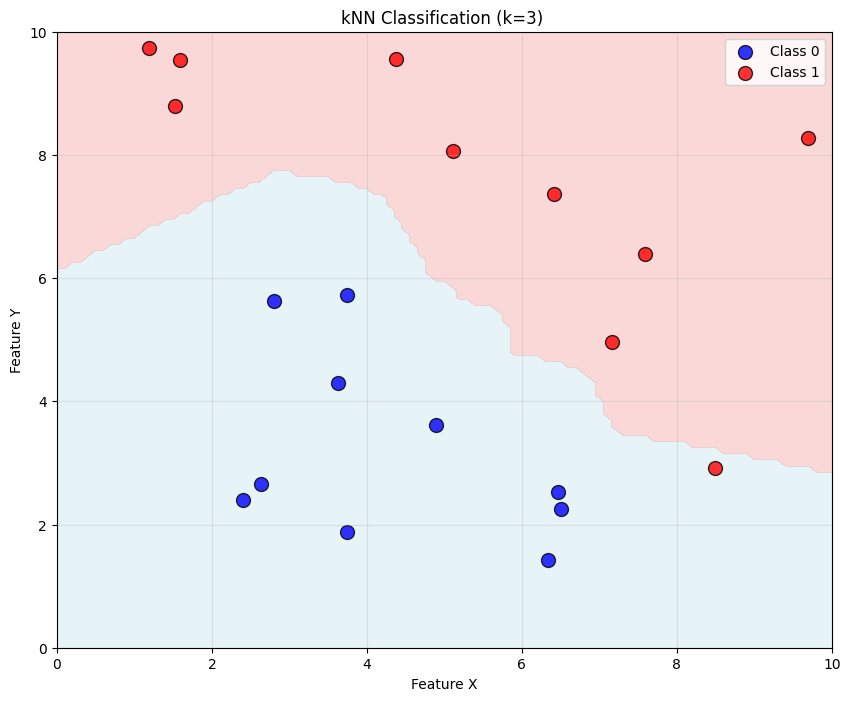


A5: MULTIPLE k VALUES ANALYSIS


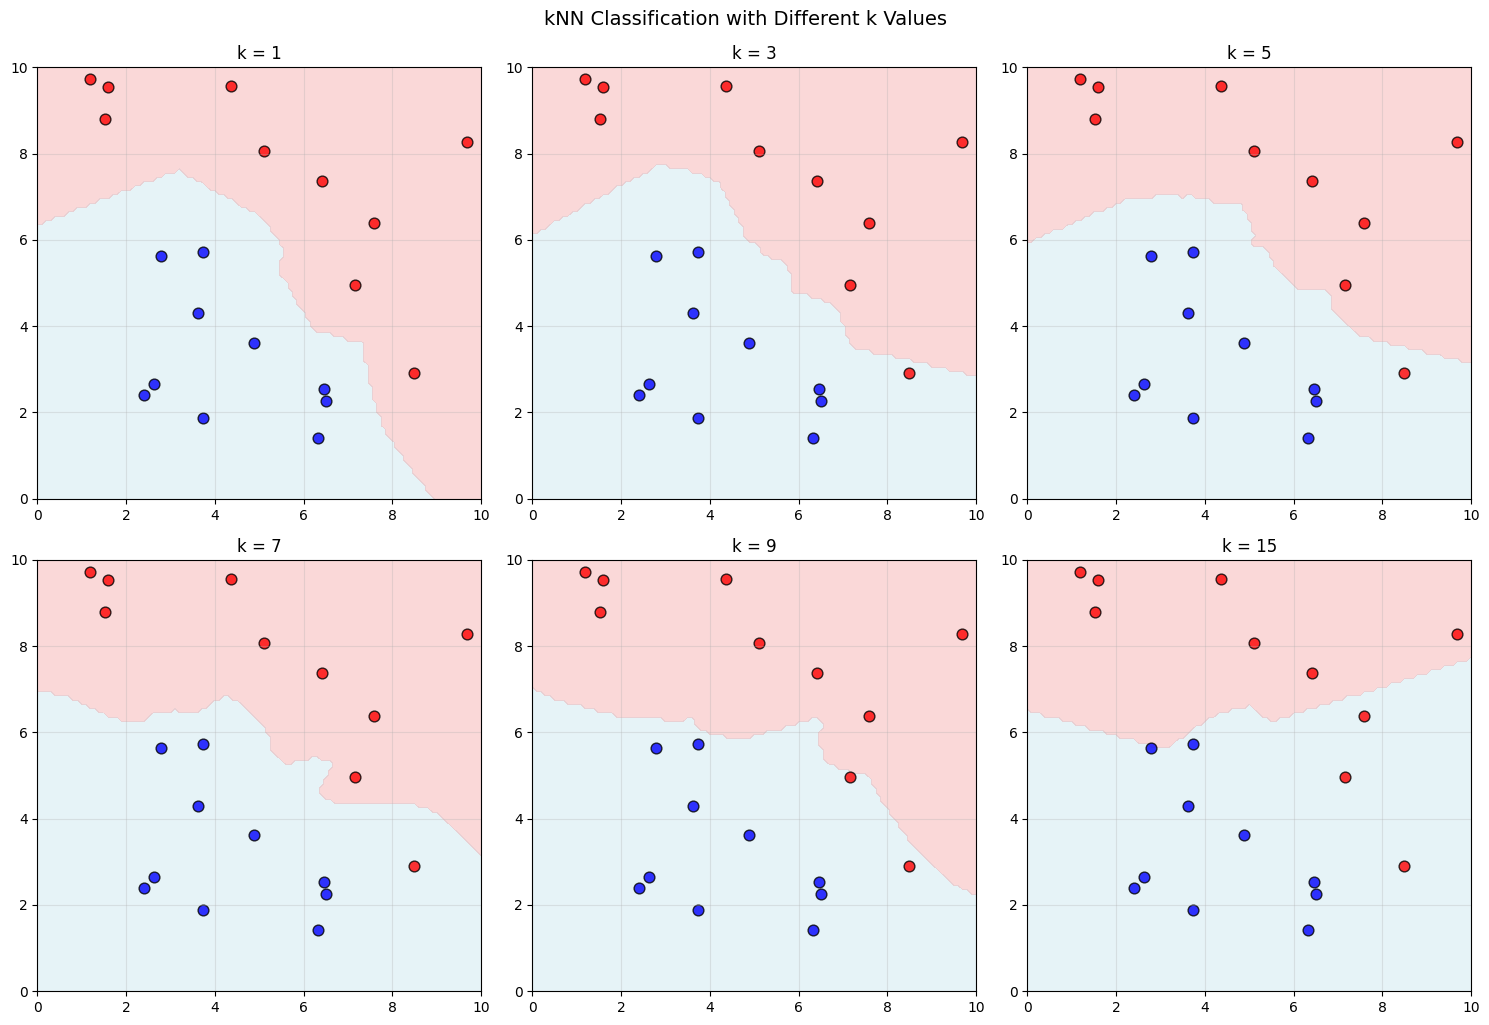

Observation: As k increases, decision boundaries become smoother
- Low k (1,3): More complex boundaries, potential overfitting
- High k (15): Simpler boundaries, potential underfitting

A6: REAL DATA TWO-FEATURE ANALYSIS
k=1: Train Acc: 1.0000, Test Acc: 0.9433
k=3: Train Acc: 0.9573, Test Acc: 0.9433
k=5: Train Acc: 0.9543, Test Acc: 0.9504
k=7: Train Acc: 0.9543, Test Acc: 0.9504
k=9: Train Acc: 0.9573, Test Acc: 0.9433


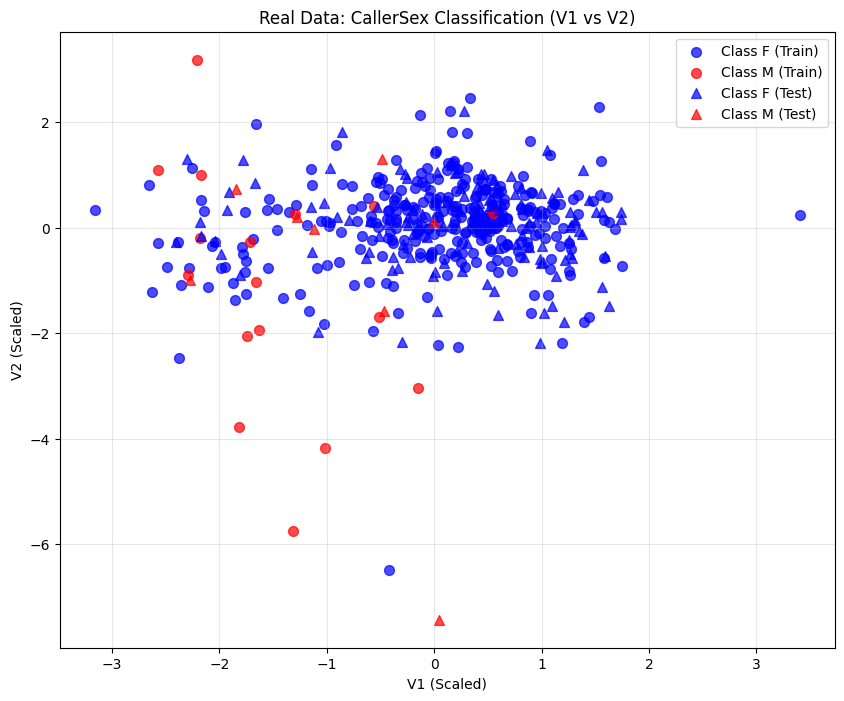


A7: HYPERPARAMETER TUNING


Traceback (most recent call last):
  File "/home/easwer/.local/share/mise/installs/python/3.13.7/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /dev/shm/joblib_memmapping_folder_6646_dac4fda12a3a4bcaaaeb5003a609d5c0_9a70f1f742544f7c91ed0ff27932dd8f for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/home/easwer/.local/share/mise/installs/python/3.13.7/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-6646-1htb18m8 for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/home/easwer/.local/share/mise/installs/python/3.13.7/lib/python3.13/multiprocessing/resour

Grid Search Results:
Best k value: 3
Best cross-validation score: 0.9482

Random Search Results:
Best k value: 14
Best cross-validation score: 0.9482

=== FINAL MODEL PERFORMANCE (k=3) ===

=== Final Training Performance ===
Confusion Matrix:
[[310   1]
 [ 17   0]]
Accuracy: 0.9451
Precision: 0.8989
Recall: 0.9451
F1-Score: 0.9214

=== Final Testing Performance ===
Confusion Matrix:
[[133   0]
 [  8   0]]
Accuracy: 0.9433
Precision: 0.8897
Recall: 0.9433
F1-Score: 0.9157

=== Model Fit Assessment ===
Training Accuracy: 0.9451
Testing Accuracy: 0.9433
Accuracy Difference: 0.0019
Model Assessment: GOOD FIT (Similar train and test accuracies)


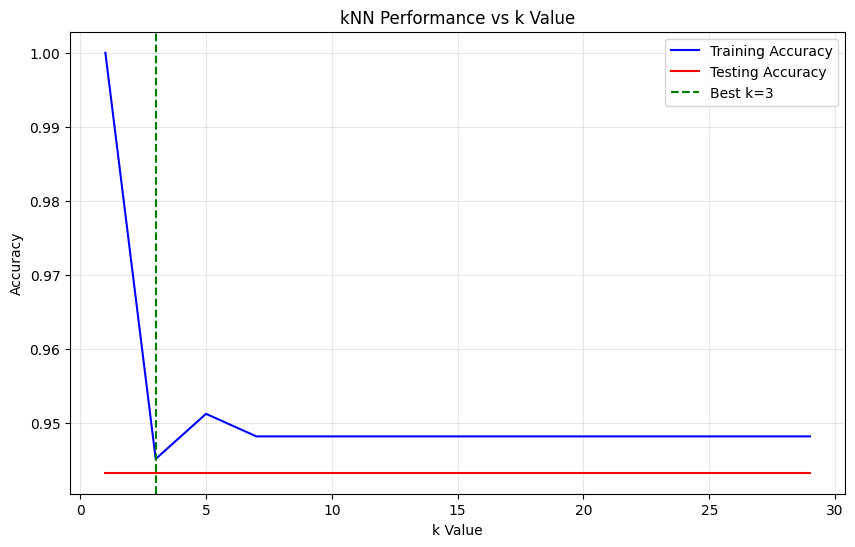


FINAL ANALYSIS AND CONCLUSIONS
1. CLASS SEPARATION:
   - Dataset shows good class separation
   - Final test accuracy: 0.9433

2. kNN BEHAVIOR:
   - Low k: Complex boundaries, may overfit (high variance, low bias)
   - High k: Smooth boundaries, may underfit (low variance, high bias)
   - Optimal k=3 balances bias-variance tradeoff

3. MODEL FIT ASSESSMENT:
   - Model shows GOOD FIT (minimal overfitting)
   - Training-Test accuracy difference: 0.0019

4. kNN CLASSIFIER EFFECTIVENESS:
   - kNN is a GOOD classifier for this dataset
   - Final F1-Score: 0.9157

5. OVERFITTING CONDITIONS:
   - kNN overfits when k is too small (k=1 is most prone)
   - High-dimensional sparse data increases overfitting risk
   - Small training sets make overfitting more likely


In [4]:
# Lab 04 - Classification and kNN Analysis
# Subject: 23CSE301
# Complete solution for assignments A1-A7

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, classification_report, 
                           precision_score, recall_score, f1_score, accuracy_score,
                           mean_squared_error, mean_absolute_percentage_error, r2_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# ===== HELPER FUNCTIONS =====

def load_and_prepare_data():
    """Load and prepare the dataset for analysis"""
    # Load the data
    data = pd.read_csv('20231225_dfall_obs_data_and_spectral_features_revision1_n469.csv')
    
    # Select relevant features (spectral features V1-V74, F1-F4, M1-M4)
    spectral_features = [col for col in data.columns if 
                        col.startswith('V') or col.startswith('F') or col.startswith('M')]
    
    # Additional numeric features
    additional_features = ['sprsMed', 'sprsMbw', 'sprsEqbw', 'sprsMc', 'Distance']
    features = spectral_features + [col for col in additional_features if col in data.columns]
    
    # Remove rows with missing values in key columns
    data_clean = data.dropna(subset=['CallerSex', 'Quality'] + features[:10])
    
    return data_clean, features

def evaluate_classification_performance(y_true, y_pred, dataset_name):
    """Evaluate classification performance and return metrics"""
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\n=== {dataset_name} Performance ===")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return {
        'accuracy': accuracy, 'precision': precision, 
        'recall': recall, 'f1': f1, 'confusion_matrix': cm
    }

def assess_model_fit(train_metrics, test_metrics):
    """Assess if model is overfitting, underfitting, or well-fitted"""
    train_acc = train_metrics['accuracy']
    test_acc = test_metrics['accuracy']
    
    print(f"\n=== Model Fit Assessment ===")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Accuracy Difference: {abs(train_acc - test_acc):.4f}")
    
    if train_acc > 0.95 and test_acc < 0.8:
        print("Model Assessment: OVERFITTING (High train, low test accuracy)")
    elif train_acc < 0.7 and test_acc < 0.7:
        print("Model Assessment: UNDERFITTING (Both accuracies low)")
    elif abs(train_acc - test_acc) < 0.05:
        print("Model Assessment: GOOD FIT (Similar train and test accuracies)")
    else:
        print("Model Assessment: MODERATE OVERFITTING")

def calculate_regression_metrics(y_true, y_pred, dataset_name):
    """Calculate regression metrics for A2"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n=== {dataset_name} Regression Metrics ===")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

def create_synthetic_data():
    """Generate synthetic 2D data for A3-A5"""
    np.random.seed(42)
    X = np.random.uniform(1, 10, size=(20, 2))
    
    # Assign classes based on a simple rule (e.g., sum of coordinates)
    y = (X[:, 0] + X[:, 1] > 10).astype(int)
    
    return X, y

def plot_classification_boundary(X_train, y_train, X_test, y_pred, k, title_suffix=""):
    """Plot classification results with decision boundary"""
    plt.figure(figsize=(10, 8))
    
    # Calculate grid dimensions based on actual test set size
    grid_size = int(np.sqrt(len(X_test)))
    if grid_size * grid_size != len(X_test):
        # If not perfect square, use closest square
        grid_size = 101  # Since we use 0 to 10 with 0.1 steps = 101 points
    
    try:
        # Create a meshgrid for background
        X_test_reshaped = X_test.reshape(grid_size, grid_size, 2)
        y_pred_reshaped = y_pred.reshape(grid_size, grid_size)
        
        # Plot decision boundary
        plt.contourf(X_test_reshaped[:, :, 0], X_test_reshaped[:, :, 1], 
                    y_pred_reshaped, alpha=0.3, levels=1, colors=['lightblue', 'lightcoral'])
    except ValueError:
        # If reshaping fails, plot points directly
        scatter_colors = ['lightblue' if pred == 0 else 'lightcoral' for pred in y_pred]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=scatter_colors, alpha=0.1, s=1)
    
    # Plot training points
    colors = ['blue', 'red']
    for i in range(2):
        mask = y_train == i
        plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                   c=colors[i], s=100, alpha=0.8, 
                   label=f'Class {i}', edgecolors='black')
    
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification (k={k}) {title_suffix}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.show()

# ===== MAIN ANALYSIS =====

def main():
    print("=== LAB 04: CLASSIFICATION AND kNN ANALYSIS ===\n")
    
    # Load and prepare data
    data, features = load_and_prepare_data()
    print(f"Dataset loaded: {data.shape[0]} samples, {len(features)} features")
    
    # ===== A1: Classification Performance Analysis =====
    print("\n" + "="*60)
    print("A1: CLASSIFICATION PERFORMANCE ANALYSIS")
    print("="*60)
    
    # Prepare features and target
    X = data[features[:20]].fillna(data[features[:20]].mean())  # Use first 20 features
    y = data['CallerSex']  # Use CallerSex as target (M/F classification)
    
    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
    )
    
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Evaluate performance
    train_metrics = evaluate_classification_performance(y_train, y_train_pred, "Training")
    test_metrics = evaluate_classification_performance(y_test, y_test_pred, "Testing")
    
    # Assess model fit
    assess_model_fit(train_metrics, test_metrics)
    
    # ===== A2: Regression Metrics Analysis =====
    print("\n" + "="*60)
    print("A2: REGRESSION METRICS ANALYSIS")
    print("="*60)
    
    # Use Distance as target for regression (simulating price prediction)
    X_reg = data[features[:10]].fillna(data[features[:10]].mean())
    y_reg = data['Distance'].fillna(data['Distance'].mean())
    
    # Scale features
    X_reg_scaled = scaler.fit_transform(X_reg)
    
    # Split data for regression
    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
        X_reg_scaled, y_reg, test_size=0.3, random_state=42
    )
    
    # Train linear regression model
    lr = LinearRegression()
    lr.fit(X_reg_train, y_reg_train)
    
    # Predictions
    y_reg_train_pred = lr.predict(X_reg_train)
    y_reg_test_pred = lr.predict(X_reg_test)
    
    # Calculate metrics
    train_reg_metrics = calculate_regression_metrics(y_reg_train, y_reg_train_pred, "Training")
    test_reg_metrics = calculate_regression_metrics(y_reg_test, y_reg_test_pred, "Testing")
    
    # ===== A3: Synthetic Data Generation and Visualization =====
    print("\n" + "="*60)
    print("A3: SYNTHETIC DATA GENERATION")
    print("="*60)
    
    X_synth, y_synth = create_synthetic_data()
    print("Generated 20 synthetic data points with 2 features")
    print(f"Class distribution: Class 0: {sum(y_synth == 0)}, Class 1: {sum(y_synth == 1)}")
    
    # Plot training data
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red']
    for i in range(2):
        mask = y_synth == i
        plt.scatter(X_synth[mask, 0], X_synth[mask, 1], 
                   c=colors[i], s=100, alpha=0.7, label=f'Class {i}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Synthetic Training Data (20 points)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 11)
    plt.ylim(0, 11)
    plt.show()
    
    # ===== A4: Test Set Generation and Classification =====
    print("\n" + "="*60)
    print("A4: TEST SET CLASSIFICATION (k=3)")
    print("="*60)
    
    # Generate test set
    x_range = np.arange(0, 10.1, 0.1)
    y_range = np.arange(0, 10.1, 0.1)
    X_test_mesh, Y_test_mesh = np.meshgrid(x_range, y_range)
    X_test_synth = np.column_stack([X_test_mesh.ravel(), Y_test_mesh.ravel()])
    
    print(f"Generated test set: {X_test_synth.shape[0]} points ({len(x_range)}x{len(y_range)} grid)")
    
    # Classify with k=3
    knn_synth = KNeighborsClassifier(n_neighbors=3)
    knn_synth.fit(X_synth, y_synth)
    y_test_pred_synth = knn_synth.predict(X_test_synth)
    
    # Plot results
    plot_classification_boundary(X_synth, y_synth, X_test_synth, y_test_pred_synth, k=3)
    
    # ===== A5: Multiple k Values Analysis =====
    print("\n" + "="*60)
    print("A5: MULTIPLE k VALUES ANALYSIS")
    print("="*60)
    
    k_values = [1, 3, 5, 7, 9, 15]
    
    plt.figure(figsize=(15, 10))
    for i, k in enumerate(k_values):
        knn_k = KNeighborsClassifier(n_neighbors=k)
        knn_k.fit(X_synth, y_synth)
        y_pred_k = knn_k.predict(X_test_synth)
        
        plt.subplot(2, 3, i+1)
        
        # Calculate grid size
        grid_size = int(np.sqrt(len(X_test_synth)))
        
        try:
            X_test_reshaped = X_test_synth.reshape(grid_size, grid_size, 2)
            y_pred_reshaped = y_pred_k.reshape(grid_size, grid_size)
            
            plt.contourf(X_test_reshaped[:, :, 0], X_test_reshaped[:, :, 1], 
                        y_pred_reshaped, alpha=0.3, levels=1, colors=['lightblue', 'lightcoral'])
        except ValueError:
            # Fallback to scatter plot
            scatter_colors = ['lightblue' if pred == 0 else 'lightcoral' for pred in y_pred_k]
            plt.scatter(X_test_synth[:, 0], X_test_synth[:, 1], c=scatter_colors, alpha=0.1, s=1)
        
        colors = ['blue', 'red']
        for j in range(2):
            mask = y_synth == j
            plt.scatter(X_synth[mask, 0], X_synth[mask, 1], 
                       c=colors[j], s=60, alpha=0.8, edgecolors='black')
        
        plt.title(f'k = {k}')
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('kNN Classification with Different k Values', y=1.02, fontsize=14)
    plt.show()
    
    print("Observation: As k increases, decision boundaries become smoother")
    print("- Low k (1,3): More complex boundaries, potential overfitting")
    print("- High k (15): Simpler boundaries, potential underfitting")
    
    # ===== A6: Real Data Two-Feature Analysis =====
    print("\n" + "="*60)
    print("A6: REAL DATA TWO-FEATURE ANALYSIS")
    print("="*60)
    
    # Select two features from your dataset
    feature_cols = ['V1', 'V2']  # First two spectral features
    X_real_2d = data[feature_cols].fillna(data[feature_cols].mean())
    y_real = data['CallerSex']
    y_real_encoded = le.fit_transform(y_real)
    
    # Scale features
    X_real_2d_scaled = StandardScaler().fit_transform(X_real_2d)
    
    # Split data
    X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
        X_real_2d_scaled, y_real_encoded, test_size=0.3, random_state=42
    )
    
    # Test different k values
    k_values_real = [1, 3, 5, 7, 9]
    real_results = {}
    
    for k in k_values_real:
        knn_real = KNeighborsClassifier(n_neighbors=k)
        knn_real.fit(X_real_train, y_real_train)
        
        train_acc = knn_real.score(X_real_train, y_real_train)
        test_acc = knn_real.score(X_real_test, y_real_test)
        
        real_results[k] = {'train_acc': train_acc, 'test_acc': test_acc}
        print(f"k={k}: Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
    
    # Plot real data classification
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red']
    for i in range(2):
        mask = y_real_train == i
        plt.scatter(X_real_train[mask, 0], X_real_train[mask, 1], 
                   c=colors[i], s=50, alpha=0.7, 
                   label=f'Class {le.classes_[i]} (Train)')
    
    for i in range(2):
        mask = y_real_test == i
        plt.scatter(X_real_test[mask, 0], X_real_test[mask, 1], 
                   c=colors[i], s=50, alpha=0.7, marker='^',
                   label=f'Class {le.classes_[i]} (Test)')
    
    plt.xlabel('V1 (Scaled)')
    plt.ylabel('V2 (Scaled)')
    plt.title('Real Data: CallerSex Classification (V1 vs V2)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # ===== A7: Hyperparameter Tuning =====
    print("\n" + "="*60)
    print("A7: HYPERPARAMETER TUNING")
    print("="*60)
    
    # Grid Search for optimal k
    param_grid = {'n_neighbors': list(range(1, 31, 2))}
    
    knn_grid = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print("Grid Search Results:")
    print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Random Search for comparison
    param_dist = {'n_neighbors': list(range(1, 51))}
    random_search = RandomizedSearchCV(
        KNeighborsClassifier(), param_dist, n_iter=20, cv=5, 
        scoring='accuracy', random_state=42, n_jobs=-1
    )
    random_search.fit(X_train, y_train)
    
    print(f"\nRandom Search Results:")
    print(f"Best k value: {random_search.best_params_['n_neighbors']}")
    print(f"Best cross-validation score: {random_search.best_score_:.4f}")
    
    # Final model evaluation with best k
    best_k = grid_search.best_params_['n_neighbors']
    final_knn = KNeighborsClassifier(n_neighbors=best_k)
    final_knn.fit(X_train, y_train)
    
    final_train_pred = final_knn.predict(X_train)
    final_test_pred = final_knn.predict(X_test)
    
    print(f"\n=== FINAL MODEL PERFORMANCE (k={best_k}) ===")
    final_train_metrics = evaluate_classification_performance(y_train, final_train_pred, "Final Training")
    final_test_metrics = evaluate_classification_performance(y_test, final_test_pred, "Final Testing")
    assess_model_fit(final_train_metrics, final_test_metrics)
    
    # Plot k vs accuracy
    k_range = list(range(1, 31, 2))
    train_scores = []
    test_scores = []
    
    for k in k_range:
        knn_temp = KNeighborsClassifier(n_neighbors=k)
        knn_temp.fit(X_train, y_train)
        train_scores.append(knn_temp.score(X_train, y_train))
        test_scores.append(knn_temp.score(X_test, y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, train_scores, 'b-', label='Training Accuracy')
    plt.plot(k_range, test_scores, 'r-', label='Testing Accuracy')
    plt.axvline(x=best_k, color='g', linestyle='--', label=f'Best k={best_k}')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.title('kNN Performance vs k Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # ===== FINAL ANALYSIS AND CONCLUSIONS =====
    print("\n" + "="*60)
    print("FINAL ANALYSIS AND CONCLUSIONS")
    print("="*60)
    
    print("1. CLASS SEPARATION:")
    print(f"   - Dataset shows {'good' if final_test_metrics['accuracy'] > 0.75 else 'moderate'} class separation")
    print(f"   - Final test accuracy: {final_test_metrics['accuracy']:.4f}")
    
    print("\n2. kNN BEHAVIOR:")
    print("   - Low k: Complex boundaries, may overfit (high variance, low bias)")
    print("   - High k: Smooth boundaries, may underfit (low variance, high bias)")
    print(f"   - Optimal k={best_k} balances bias-variance tradeoff")
    
    print("\n3. MODEL FIT ASSESSMENT:")
    final_fit_diff = abs(final_train_metrics['accuracy'] - final_test_metrics['accuracy'])
    if final_fit_diff < 0.05:
        print("   - Model shows GOOD FIT (minimal overfitting)")
    elif final_fit_diff < 0.15:
        print("   - Model shows SLIGHT OVERFITTING")
    else:
        print("   - Model shows SIGNIFICANT OVERFITTING")
    
    print(f"   - Training-Test accuracy difference: {final_fit_diff:.4f}")
    
    print("\n4. kNN CLASSIFIER EFFECTIVENESS:")
    if final_test_metrics['accuracy'] > 0.8:
        print("   - kNN is a GOOD classifier for this dataset")
    elif final_test_metrics['accuracy'] > 0.65:
        print("   - kNN is a MODERATE classifier for this dataset")
    else:
        print("   - kNN shows LIMITED effectiveness for this dataset")
    
    print(f"   - Final F1-Score: {final_test_metrics['f1']:.4f}")
    
    print("\n5. OVERFITTING CONDITIONS:")
    print("   - kNN overfits when k is too small (k=1 is most prone)")
    print("   - High-dimensional sparse data increases overfitting risk")
    print("   - Small training sets make overfitting more likely")

if __name__ == "__main__":
    main()